In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inline Plots in Jupyter
%matplotlib inline

In [23]:
data = pd.read_csv('heart_dataset.csv')
data.shape

(1510, 14)

In [24]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,53.903974,0.747682,1.852980,132.247682,219.640397,0.150331,0.662914,141.713907,0.386093,1.013683,0.652980,0.570861,2.660265,0.527815
std,9.293715,0.434487,1.147609,17.886013,94.110709,0.357514,0.813009,25.295083,0.487014,1.136282,0.592734,0.853759,1.488350,0.499391
min,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,198.250000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,233.500000,0.000000,0.000000,143.500000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,271.000000,0.000000,1.000000,161.000000,1.000000,1.800000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,7.000000,1.000000


In [25]:
data.target.value_counts()

target
1    797
0    713
Name: count, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1510 non-null   int64  
 1   sex       1510 non-null   int64  
 2   cp        1510 non-null   int64  
 3   trestbps  1510 non-null   int64  
 4   chol      1510 non-null   int64  
 5   fbs       1510 non-null   int64  
 6   restecg   1510 non-null   int64  
 7   thalach   1510 non-null   int64  
 8   exang     1510 non-null   int64  
 9   oldpeak   1510 non-null   float64
 10  slope     1510 non-null   int64  
 11  ca        1510 non-null   int64  
 12  thal      1510 non-null   int64  
 13  target    1510 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 165.3 KB


In [27]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
X = data.iloc[:,:13].values
y = data["target"].values

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential

classifier = Sequential()

# Input Layer
classifier.add(InputLayer(shape=(13,)))

# 1st hidden layer
classifier.add(Dense(units=145,activation="relu",))

# 2nd hidden layer
classifier.add(Dense(units=120,activation="relu",))

# 3rd hidden layer
classifier.add(Dense(units=70,activation="relu",))

# Output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [32]:
classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 145)            │         2,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 120)            │        17,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 70)             │         8,470 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,091 (109.73 KB)

 Trainable params: 28,091 (109.73 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
classifier_report = classifier.fit(X_train,y_train,validation_split=0.30, batch_size=70,epochs=145,verbose=1)

Epoch 1/145
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 400ms/step - accuracy: 0.7146 - loss: 0.6072 - val_accuracy: 0.7206 - val_loss: 0.5449
Epoch 2/145
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7437 - loss: 0.4998 - val_accuracy: 0.7559 - val_loss: 0.5061
Epoch 3/145
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7626 - loss: 0.4592 - val_accuracy: 0.7735 - val_loss: 0.4750
Epoch 4/145
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7942 - loss: 0.4256 - val_accuracy: 0.7706 - val_loss: 0.4558
Epoch 5/145
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8321 - loss: 0.4026 - val_accuracy: 0.7853 - val_loss: 0.4535
Epoch 6/145
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8396 - loss: 0.3767 - val_accuracy: 0.7559 - val_loss: 0.4460
Epoch 7/145
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8333 - loss: 0.3554 - val_accuracy: 0.7676 - val_loss: 0.4425
Epoch 8/145
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8523 - loss: 0.3385 - val_accuracy: 0

In [34]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.45)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


In [35]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score*100)

77.77777777777779


In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[140  44]
 [ 40 154]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       184
           1       0.78      0.79      0.79       194

    accuracy                           0.78       378
   macro avg       0.78      0.78      0.78       378
weighted avg       0.78      0.78      0.78       378



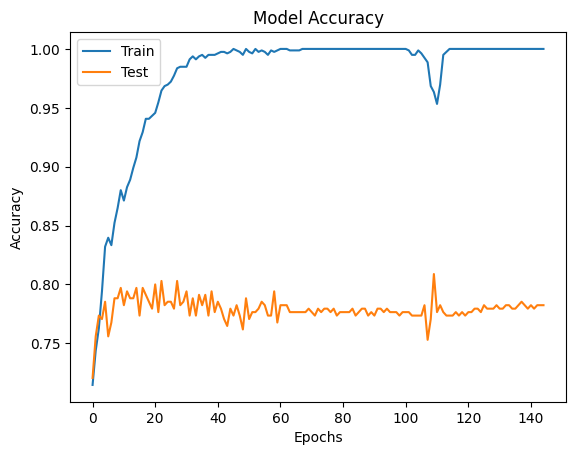

In [38]:
# Acuracy Plot
plt.plot(classifier_report.history['accuracy'])
plt.plot(classifier_report.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

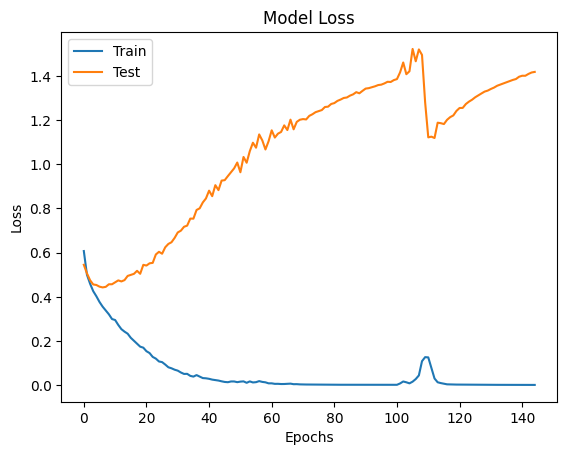

In [39]:
# summarize history for loss
plt.plot(classifier_report.history['loss'])
plt.plot(classifier_report.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()